In [1]:
import numpy as np
import matplotlib.pyplot as plt
import helper_functions as hf
import quantum_backend as qb

### The error model which we are using is $\Lambda=\sum^{15}_{i=0} p_i E_i\rho E_i^\dagger$, which is acting on the 5 data qubits, and $p_i$ is such that $\sum_{i=0}^{15} p_i=1$. 

### Note that the five-qubit code has 16 possible syndromes, each mapping to a distinct single-qubit error.

### We then can generate a 4-by-4 heatmap, seeing how probably each syndrome is.


🎉🥳 Syndrome heatmap generated! Time to rearrange the grid! 🎉🥳


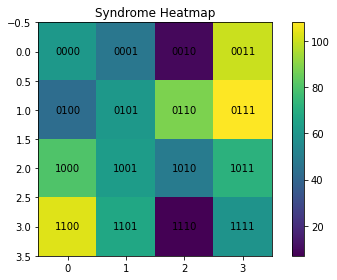

In [12]:
if __name__ == '__main__':
    hf.clear()
    backend = qb.get_QI_backend(backend_type="QX single-node simulator")
    np.random.seed(0) # fixed seed.
    p = np.random.rand(16)
    p = p/np.sum(p)
    shots = 1024
    default_valid_inputs = ["I","X0","Y0","Z0","X1","Y1","Z1","X2","Y2","Z2","X3","Y3","Z3","X4","Y4","Z4"]

    counts = np.zeros(16)
    for i,elem in enumerate(default_valid_inputs):
        qc = qb.generate_QuantumCircuit(elem)
        qc_job = qb.execute_QuantumCircuit(qc,backend=backend,shots=int(shots*p[i]))
        if i == 0:
            result_dict = qc_job.result().get_counts()
        else:
            result_dict.update(qc_job.result().get_counts())

    syndrome = np.array(list(result_dict.keys())) # Convert dictionary keys to numpy array.
    sortarg = np.argsort(np.array([int(x,2) for x in syndrome])) # Indices that would sort an array.
    syndrome = syndrome[sortarg].reshape([4,4])
    counts = np.fromiter(result_dict.values(), dtype=float) # Convert dictionary values to numpy array.
    counts = counts[sortarg].reshape([4,4])
    
    fig, ax = plt.subplots() # https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
    im = ax.imshow(counts)
    for i in range(4):
        for j in range(4):
            text = ax.text(j, i, syndrome[i,j],
                        ha="center", va="center", color="k")
    ax.set_title("Syndrome Heatmap")
    fig.tight_layout()
    fig.colorbar(im)
    print(f"\n🎉🥳 {hf.OKGREEN}Syndrome heatmap generated! Time to rearrange the grid!{hf.ENDC} 🎉🥳")
    plt.show()

### We swap ancillas $a_1$ and $a_2$ and regenerate the heatmap.


We swapped ancilla 1 and ancilla 2 and regenerated the heatmap.


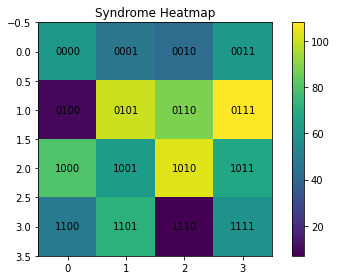

In [11]:
if __name__ == '__main__':
    hf.clear()
    backend = qb.get_QI_backend(backend_type="QX single-node simulator")
    np.random.seed(0) # fixed seed.
    p = np.random.rand(16)
    p = p/np.sum(p)
    shots = 1024
    default_valid_inputs = ["I","X0","Y0","Z0","X1","Y1","Z1","X2","Y2","Z2","X3","Y3","Z3","X4","Y4","Z4"]

    counts = np.zeros(16)
    for i,elem in enumerate(default_valid_inputs):
        qc = qb.generate_QuantumCircuit_with_swap(elem)
        qc_job = qb.execute_QuantumCircuit(qc,backend=backend,shots=int(shots*p[i]))
        if i == 0:
            result_dict = qc_job.result().get_counts()
        else:
            result_dict.update(qc_job.result().get_counts())

    syndrome = np.array(list(result_dict.keys())) # Convert dictionary keys to numpy array.
    sortarg = np.argsort(np.array([int(x,2) for x in syndrome])) # Indices that would sort an array.
    syndrome = syndrome[sortarg].reshape([4,4])
    counts = np.fromiter(result_dict.values(), dtype=float) # Convert dictionary values to numpy array.
    counts = counts[sortarg].reshape([4,4])

    fig, ax = plt.subplots() # https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
    im = ax.imshow(counts)
    for i in range(4):
        for j in range(4):
            text = ax.text(j, i, syndrome[i,j],
                        ha="center", va="center", color="k")
    ax.set_title("Syndrome Heatmap")
    fig.tight_layout()
    fig.colorbar(im)
    print(f"\n{hf.OKGREEN}We swapped ancilla 1 and ancilla 2 and regenerated the heatmap.{hf.ENDC}")
    plt.show()

### We can do this multiple times and we can analyse the resulting heatmaps how we can prioritise to physically arrange the noisy qubits in such a way we can mitigate error.